In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Générez cette base de données synthétiques 

In [39]:
X1=np.random.normal((1,1),0.7,size=(300,2))
X2=np.random.normal((-1,-1),0.7,size=(300,2))

# 2. Affichez le nuage de points pour obtenir un résultat similaire à celui de la figure 

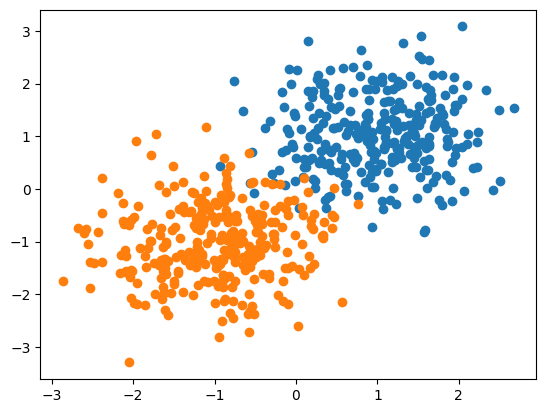

In [89]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

# 3. Importez la module de régression logistique de scikit-learn 1 et lancer l’entrainement sur la base synthétique que vous venez de créer

In [90]:
y=np.array([0 if i <300 else 1 for i in range(600)])
X=np.concatenate((X1,X2),axis=0)

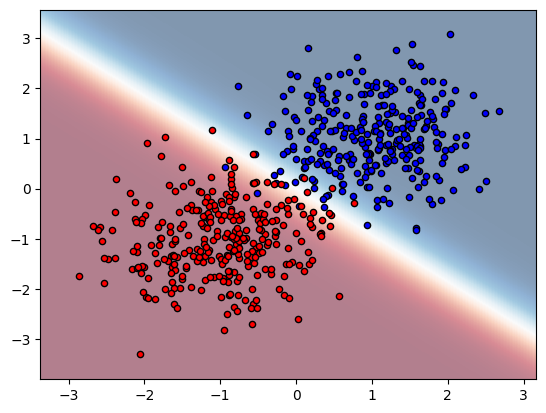

In [91]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy
    
xtest_grid , xx , yy = mesh(X)
log_reg=LogisticRegression()
log_reg.fit(X[:,0:2],y)
Z = log_reg.predict_proba(xtest_grid)[:, 0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

# 2 Régression logistique sur le problème joue

## 1. Implémentez le calcul du coût en complétant la fonction ci-dessous

In [97]:
def logreg_cost(X, y, w):
   z=w@X+1
   cost=-y@z+np.log(1+np.exp(z))
   return cost

## 2. Implémentez le calcul du gradient de la fonction de coût en complétant la fonction ci-dessous

In [99]:
def logreg_grad(X, y, w):
    p=w.T@X+1
    cost=-X.T@(y-p)
    return cost

## 3. Implémentez l’estimation des paramètres du modèle de regression logistique en utilisant la méthode de descente de gradient

In [96]:
def logreg_descent(X, y, learning_rate =1e-3, max_iter =1000):
    n, d = X.shape
    X = np.concatenate ((X, np.ones((n, 1))), axis =1)
    w0 = np.random.randn(d+1)
    step = learning_rate
    beta = 0.9 # for backtracking if needed - to tune
    w=w0-step*logreg_grad(X, y, w0)
    while np.linalg.norm(logreg_cost(X,y,w)-logreg_cost(X,y,w0))>1e-2 and iteration<max_iter:
        w0=w
        w=w-step*logreg_grad(X, y, w0)
    costs=logreg_cost(X,y,w)
    return w, costs

In [100]:
logreg_descent(X, y, learning_rate =1e-3, max_iter =1000)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 600 is different from 3)

In [103]:
w0 = np.random.randn(3)

In [105]:
w0@X

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 600 is different from 3)